## importing the necessary libraries

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import precision_score, recall_score, f1_score



In [104]:
#reading in the dataset

In [105]:
dataset = pd.read_csv("C:/Users/User/Downloads/individual project dataset/credit_risk_dataset.csv")

In [106]:
#checking for the first five rows

In [107]:
dataset.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [108]:
dataset.shape

(32581, 12)

## subsetting some rows in my dataset for testing my app

In [109]:
df_final_data = dataset[(dataset["loan_int_rate"] <= 10.00) & (dataset["person_income"]< 200000) &(dataset["loan_status"]==0)]

In [110]:
df_final_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
14,23,115000,RENT,2.0,EDUCATION,A,35000,7.90,0,0.30,N,4
16,23,120000,RENT,0.0,EDUCATION,A,35000,7.90,0,0.29,N,4
20,25,162500,RENT,2.0,VENTURE,A,35000,7.49,0,0.22,N,4
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3
27,23,11000,OWN,0.0,PERSONAL,A,1400,9.32,0,0.13,N,3


In [111]:
df1_final_data = dataset[(dataset["loan_int_rate"]>= 15.0) & (dataset["person_income"] > 20000) & (dataset["loan_status"]==1)]

In [112]:
df1_final_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
13,26,108160,RENT,4.0,EDUCATION,E,35000,18.39,1,0.32,N,4
17,23,92111,RENT,7.0,MEDICAL,F,35000,20.25,1,0.32,N,4
18,23,113000,RENT,8.0,DEBTCONSOLIDATION,D,35000,18.25,1,0.31,N,4


## statistical analysis

In [113]:
#checking for the statistical description of the dataset 

In [114]:
dataset.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [115]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [116]:
#checking for missing values

In [117]:
dataset.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [118]:
#filling in the missing values with the median value

In [119]:
mean_emp_length = dataset["person_emp_length"].median()
mean_loan_int = dataset["loan_int_rate"].median()
dataset["person_emp_length"] = dataset["person_emp_length"].fillna(mean_emp_length)
dataset["loan_int_rate"] = dataset["loan_int_rate"].fillna(mean_loan_int)

In [120]:
dataset.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

## Exploratory Data Analysis

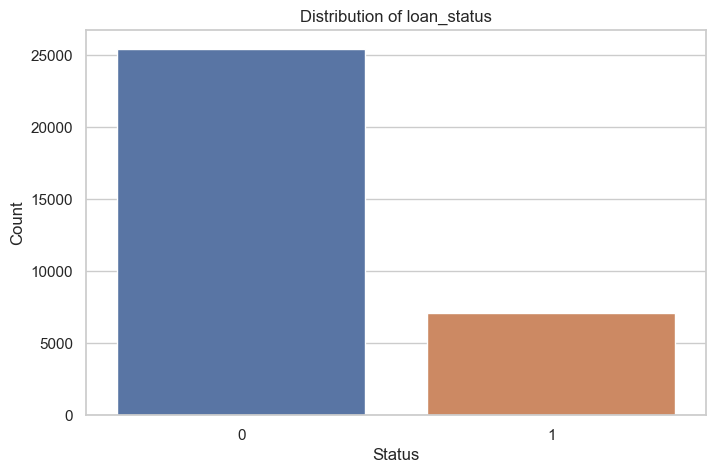

In [121]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x=dataset['loan_status'], ax=ax)
ax.set_title('Distribution of loan_status')
ax.set_xlabel('Status')
ax.set_ylabel('Count')
plt.show()

The plot above tries to show the value count of the target variable to determine if the dataset is imbalanced. Here we can see that the classes of (0 = non default) are way more than the classes of (1 = default), which means this is an imbalanced dataset.

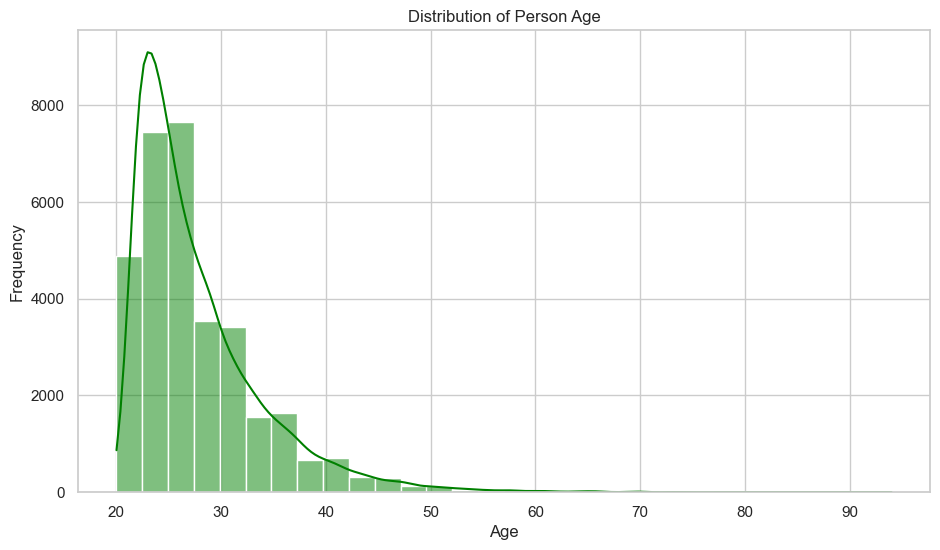

In [122]:
# Removal of unrealistic age values from the analysis, age should not be above 100
filtered_dataset = dataset[dataset['person_age'] <= 100]

# Plotting the distribution of age
plt.figure(figsize=(11, 6))
sns.histplot(filtered_dataset['person_age'], bins=30, kde=True, color = "green")
plt.title('Distribution of Person Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The distribution of the histogram was at its peak around the late 20s to early 30s, implying that a large number of individuals in the dataset fell within this age range. The frequency of individuals sharply reduces as age increases beyond 30, this shows that there are fewer older individuals in the dataset.

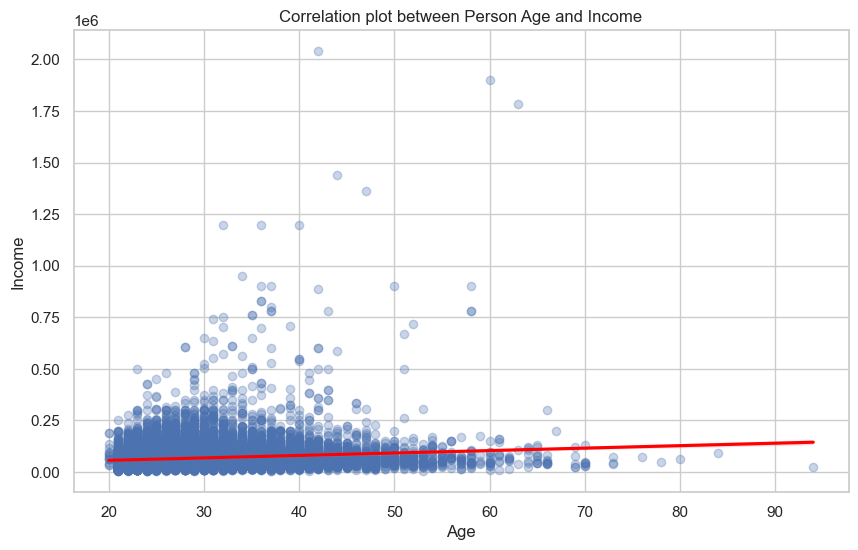

In [123]:
# Scatter plot to display the relationship between age and income
plt.figure(figsize=(10, 6))
sns.regplot(x='person_age', y='person_income', data=filtered_dataset, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Correlation plot between Person Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)
plt.show()


The plot above suggests that for this dataset, while there is some variation in income with age, there isn't a strong or consistent trend existing in the dataset, indicating that older individuals earn significantly more than younger ones.

In [124]:
#A correlation plot of all the numeric variables

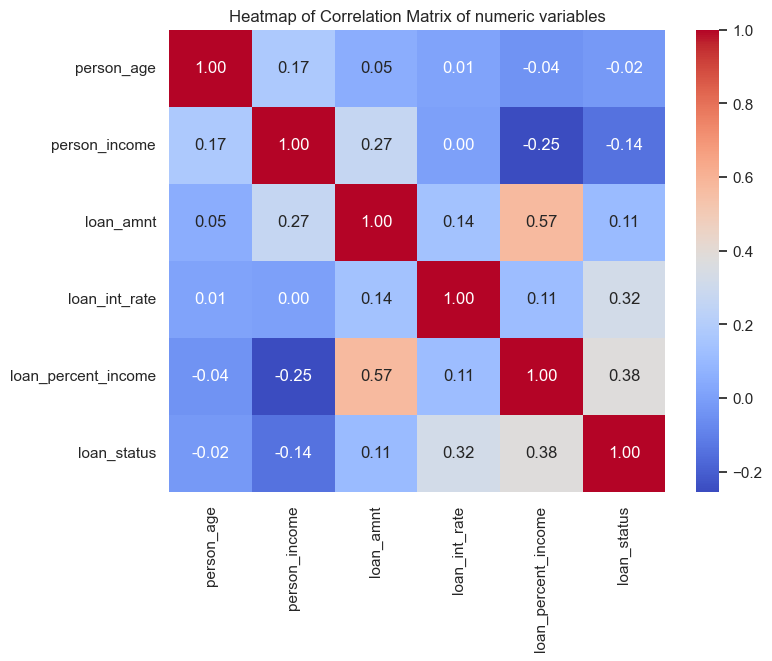

In [125]:
columns_selected = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income','loan_status']
subset_data = dataset[columns_selected]

# Calculating the correlation matrix
correlation_matrix = subset_data.corr()

# Ploting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlation Matrix of numeric variables')
plt.show()


The heatmap above tries to display the correlation that exist between all the numeric variables. the highest correlation was the correlation between loan percent income and loan amount. it shows a correlation of 0.57 which means the higher the loan amount, the higher the loan percent income.

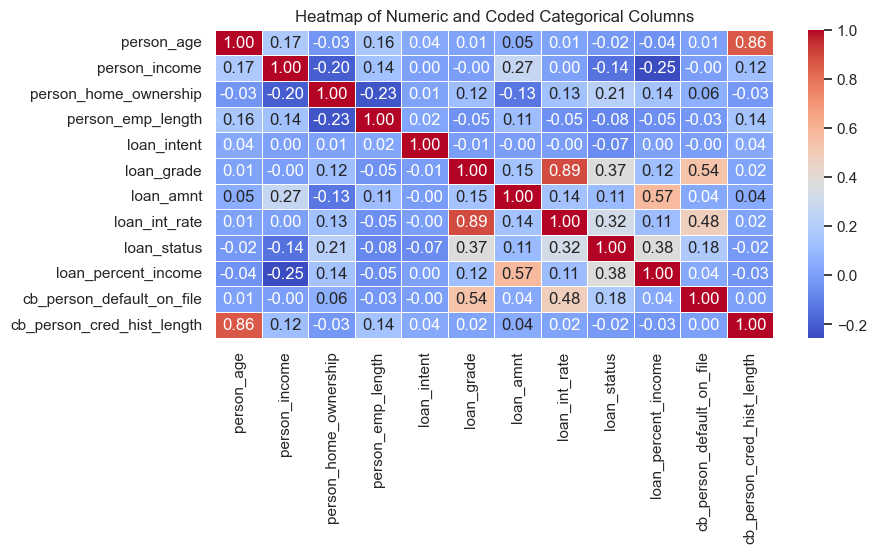

In [126]:
# A confusion matrix of all the columns
 
for col in dataset.select_dtypes(include=['object']).columns:
    dataset[col] = dataset[col].astype('category').cat.codes

# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Create a heatmap
plt.figure(figsize=(9, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap of Numeric and Coded Categorical Columns')
plt.show()
plt.show()

INTERPRETATION: Person_age and cb_person_cred_hist_length are highly related with a positive correlation of  0.86, the older you get, the longer your credit history is accumulated. This is reasonable, considering that the older a person gets, he has had more time to build his credit over the years. Loan_int_rate and loan_status have a correlation of 0.32 (a moderate one) showing as expected that higher interest rates are associated with a greater chance of defaulting on the loan. The loan_percent_income and loan_status variables have a moderately positive association of 0.38, meaning that an increase in the percentage of a borrower's income allocated to loan servicing is likely to result in a higher chance of default.

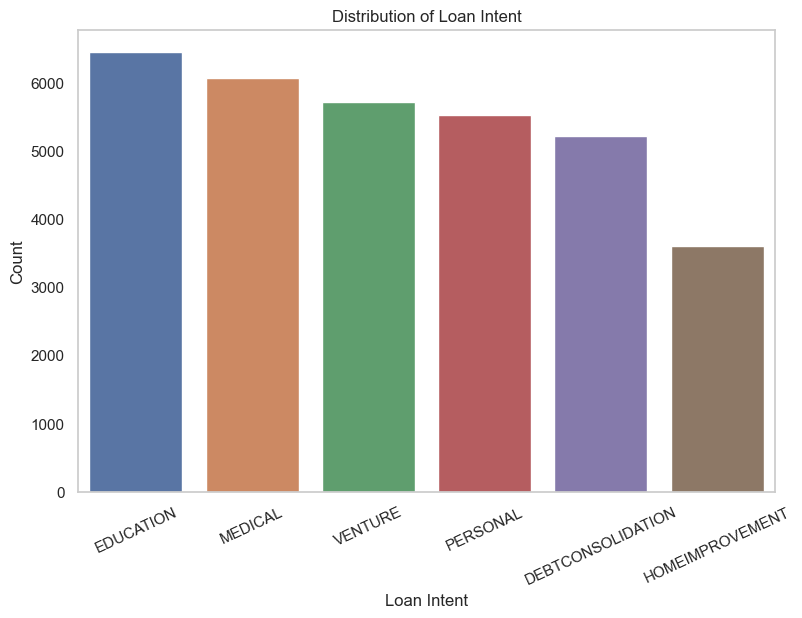

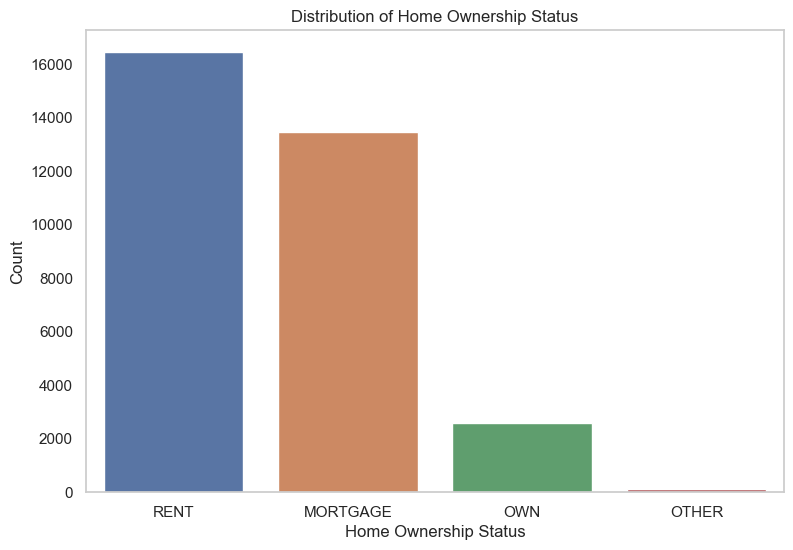

In [127]:
# Plotting how loan intents is distributed
plt.figure(figsize=(9, 6))
sns.countplot(x='loan_intent', data=filtered_dataset, order=filtered_dataset['loan_intent'].value_counts().index)
plt.title('Distribution of Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.xticks(rotation=25)
plt.grid(axis='y')
plt.show()

# Plotting how home ownership status is distributed
plt.figure(figsize=(9, 6))
sns.countplot(x='person_home_ownership', data=filtered_dataset, order=filtered_dataset['person_home_ownership'].value_counts().index)
plt.title('Distribution of Home Ownership Status')
plt.xlabel('Home Ownership Status')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


For the loan intent, The plot above shows that from the dataset most people who came to request a loan did so because they needed the money for their education.

For the home ownership, The plot above shows that most people in the dataset who requested credit live in a rented apartment.


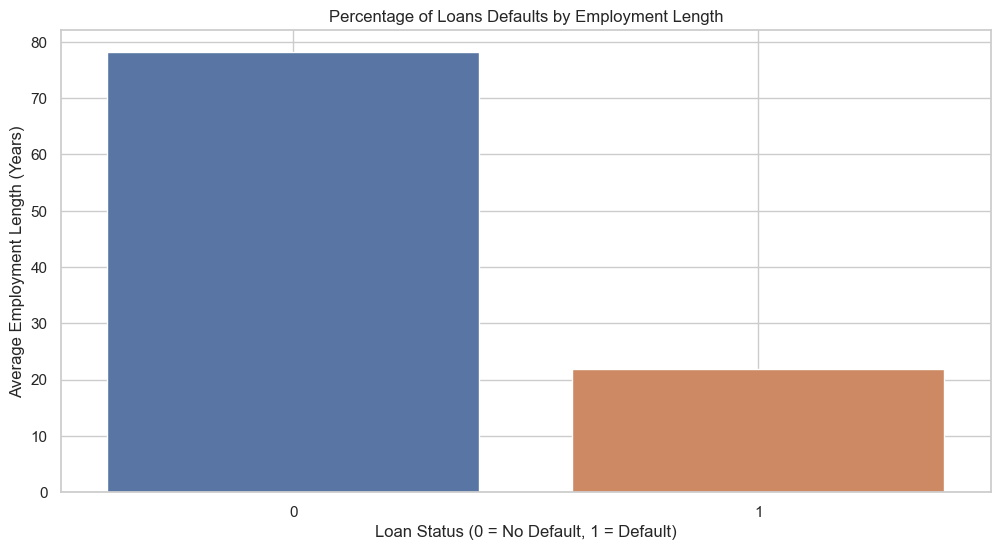

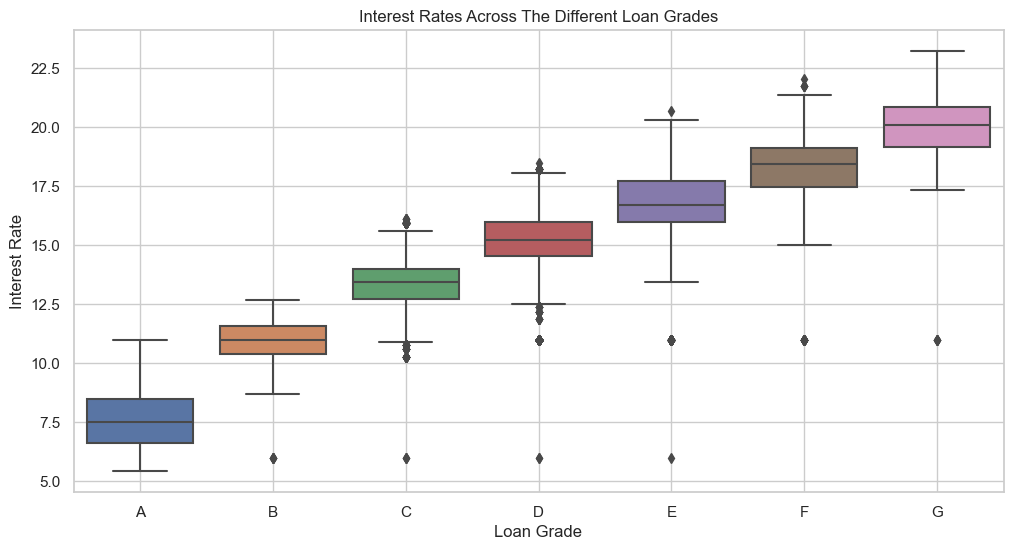

In [128]:
# displaying Employment Length vs. Loan Status
plt.figure(figsize=(12, 6))
sns.barplot(x='loan_status', y='person_emp_length', data=filtered_dataset, estimator=lambda x: len(x) / len(filtered_dataset) * 100)
plt.title('Percentage of Loans Defaults by Employment Length')
plt.xlabel('Loan Status (0 = No Default, 1 = Default)')
plt.ylabel('Average Employment Length (Years)')
plt.grid(True)
plt.show()

# A plot of the distribution and averages of interest rates across different loan grades
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_grade', y='loan_int_rate', data=filtered_dataset, order=sorted(filtered_dataset['loan_grade'].unique()))
plt.title('Interest Rates Across The Different Loan Grades')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
plt.grid(True)
plt.show()


For loan default by employment length, the average employment duration of people who have not defaulted on their loans (Loan Status 0) is noticeably longer. This may imply that a longer job history is linked to better financial standing and a decreased risk of default. On the other hand, the average job duration of individuals who have defaulted (Loan Status 1) is significantly lower.

For interest rate across different loan grade in the plot above, as loan grade increases from(A to G), the interest rate generally goes up. The trend shows that higher risk categories (i.e. grades D to G) generally have a greater propensity for higher interest rates in line with those of other loans within the same bracket, For example, grades A through C have lower interest rates because they are considered low-risk categories.

## FEATURE ENGINEERING

In [129]:
#checking for duplicates

In [130]:
dataset.duplicated().sum()

165

In [131]:
dataset_cleaned = dataset.drop_duplicates()


In [132]:
#checking if the duplicates has been successfully removed

In [133]:
dataset_cleaned.duplicated().sum()

0

In [134]:
#checking for outliers in the age column

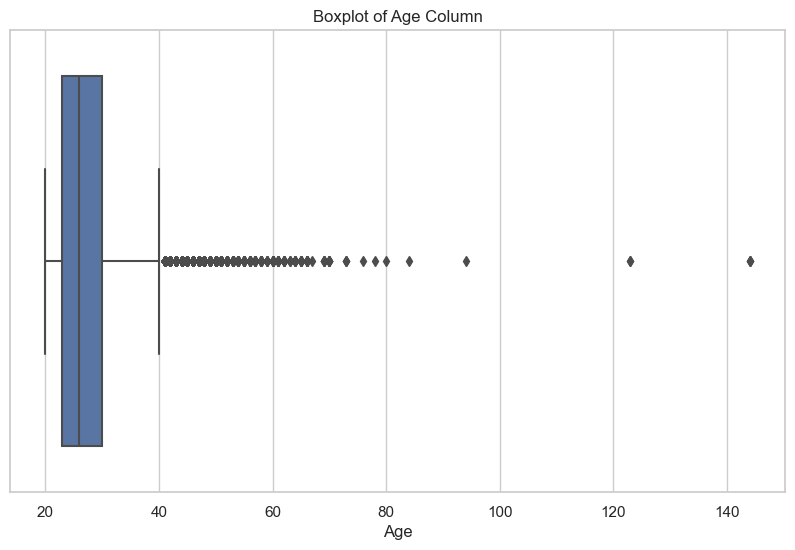

In [135]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset_cleaned['person_age'])
plt.title('Boxplot of Age Column')
plt.xlabel('Age')
plt.show()

In [136]:
dataset_cleaned['person_age'].min()

20

In [137]:
dataset_cleaned['person_age'].max()

144

In [138]:
#dropping outliers in the age column

In [139]:
(dataset_cleaned['person_age'].value_counts().values>90).sum()

27

In [140]:
final_dataset = dataset_cleaned.drop(dataset_cleaned[dataset_cleaned['person_age'] > 90].index, axis=0)

In [141]:
final_dataset['person_age'].max()

84

In [142]:
#checking for the number of people in each age category

In [143]:
def age_category(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        df = arr[i]+1
        num_people = final_dataset['person_age'].between(df,arr[i+1]).sum()
        print(f'Age between {df} and {arr[i+1]}: Number of people {num_people}')
        
age_category([0 ,19, 26, 36, 46, 56, 66])


Age between 1 and 19: Number of people 0
Age between 20 and 26: Number of people 17707
Age between 27 and 36: Number of people 11796
Age between 37 and 46: Number of people 2356
Age between 47 and 56: Number of people 433
Age between 57 and 66: Number of people 98


In [144]:
# Creating new categories
final_dataset['Loan_to_Income_Ratio'] = final_dataset['loan_amnt'] / final_dataset['person_income']
final_dataset['Age_Group'] = pd.cut(final_dataset['person_age'], bins=[0, 25, 40, 65, 90], 
                                    labels=['Young', 'Adult', 'Senior', 'Elderly'])

# Show the new features
print(final_dataset[['Loan_to_Income_Ratio', 'Age_Group']].head())


   Loan_to_Income_Ratio Age_Group
0              0.593220     Young
1              0.104167     Young
2              0.572917     Young
3              0.534351     Young
4              0.643382     Young


In [145]:
final_dataset['Loan_to_Income_Ratio'].min()

0.0007894736842105263

In [146]:
final_dataset['Loan_to_Income_Ratio'].max()

0.83

In [147]:
dataset.shape

(32581, 12)

In [148]:
final_dataset['Age_Group'].unique()

['Young', 'Adult', 'Senior', 'Elderly']
Categories (4, object): ['Young' < 'Adult' < 'Senior' < 'Elderly']

In [149]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32410 entries, 0 to 32580
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  32410 non-null  int64   
 1   person_income               32410 non-null  int64   
 2   person_home_ownership       32410 non-null  int8    
 3   person_emp_length           32410 non-null  float64 
 4   loan_intent                 32410 non-null  int8    
 5   loan_grade                  32410 non-null  int8    
 6   loan_amnt                   32410 non-null  int64   
 7   loan_int_rate               32410 non-null  float64 
 8   loan_status                 32410 non-null  int64   
 9   loan_percent_income         32410 non-null  float64 
 10  cb_person_default_on_file   32410 non-null  int8    
 11  cb_person_cred_hist_length  32410 non-null  int64   
 12  Loan_to_Income_Ratio        32410 non-null  float64 
 13  Age_Group            

ANALYSIS WITH ALL THE COLUMNS

In [150]:
final_dataset.shape

(32410, 14)

In [151]:
final_dataset.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Loan_to_Income_Ratio,Age_Group
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3,0.593220,Young
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2,0.104167,Young
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3,0.572917,Young
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2,0.534351,Young
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4,0.643382,Young


## DATA PREPROCESSING

In [152]:
# Converting all categorical variables using one-hot encoding
encoded_dataset = pd.get_dummies(final_dataset, columns=['person_home_ownership', 
                                                         'loan_intent', 'loan_grade', "cb_person_default_on_file", 'Age_Group'])
encoded_dataset.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,Loan_to_Income_Ratio,person_home_ownership_0,...,loan_grade_3,loan_grade_4,loan_grade_5,loan_grade_6,cb_person_default_on_file_0,cb_person_default_on_file_1,Age_Group_Young,Age_Group_Adult,Age_Group_Senior,Age_Group_Elderly
0,22,59000,123.0,35000,16.02,1,0.59,3,0.593220,False,...,True,False,False,False,False,True,True,False,False,False
1,21,9600,5.0,1000,11.14,0,0.10,2,0.104167,False,...,False,False,False,False,True,False,True,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,0.572917,True,...,False,False,False,False,True,False,True,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,0.534351,False,...,False,False,False,False,True,False,True,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,0.643382,False,...,False,False,False,False,False,True,True,False,False,False


In [153]:
# Prepare features and target
X = encoded_dataset.drop('loan_status', axis=1)
y = encoded_dataset['loan_status']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling the  features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




**IMBALANCED DATASET**

In [154]:
#balancing the dataset using smote techniques

In [155]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("Before applying SMOTE, counts of label '1':", sum(y_train == 1))
print("Before applying SMOTE, counts of label '0':", sum(y_train == 0))
print("After applying SMOTE, counts of label '1':", sum(y_train_smote == 1))
print("After applying SMOTE, counts of label '0':", sum(y_train_smote == 0))


Before applying SMOTE, counts of label '1': 5687
Before applying SMOTE, counts of label '0': 20241
After applying SMOTE, counts of label '1': 20241
After applying SMOTE, counts of label '0': 20241


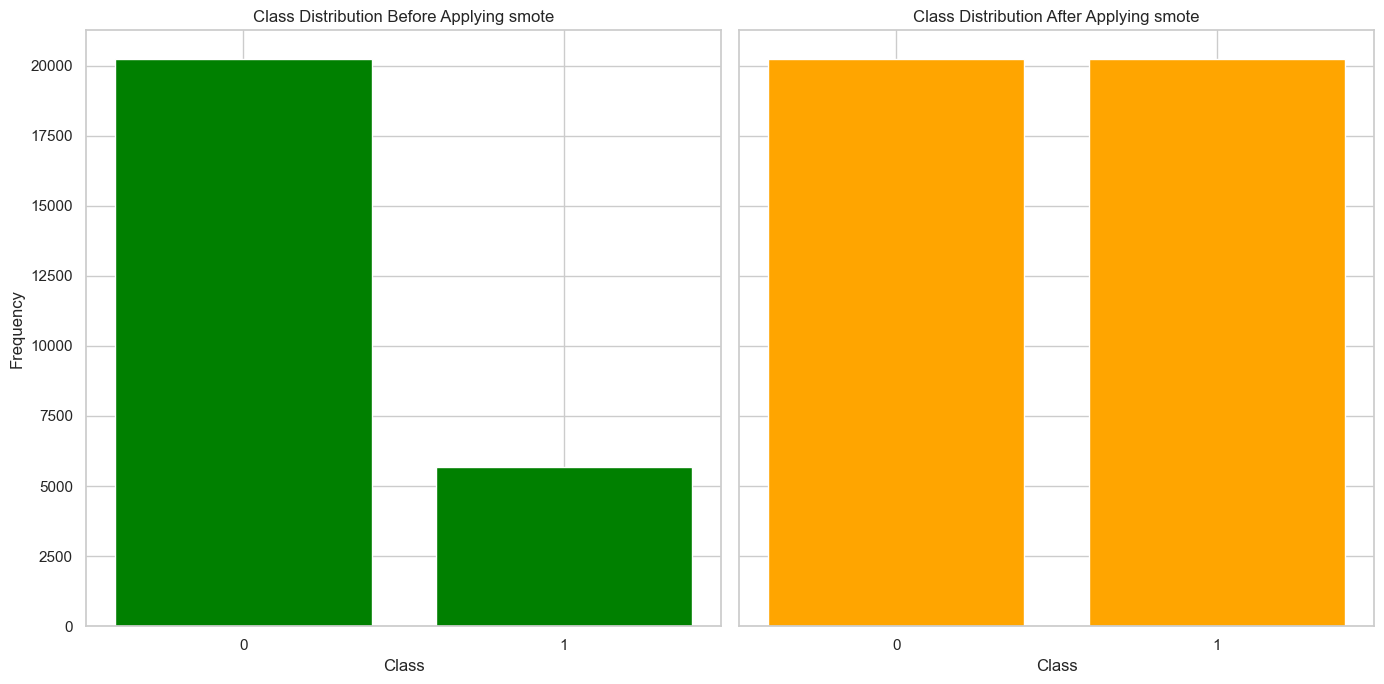

In [156]:
# Calculating class distributions
original_class_distribution = y_train.value_counts()
oversampled_class_distribution = y_train_smote.value_counts()

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Plot before applying smote
axs[0].bar(original_class_distribution.index, original_class_distribution.values, color='green')
axs[0].set_title('Class Distribution Before Applying smote')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Frequency')
axs[0].set_xticks(original_class_distribution.index)

# Plot after applying smote
axs[1].bar(oversampled_class_distribution.index, oversampled_class_distribution.values, color='orange')
axs[1].set_title('Class Distribution After Applying smote')
axs[1].set_xlabel('Class')
axs[1].set_xticks(original_class_distribution.index)

# Show the plot
plt.tight_layout()
plt.show()


## Building models

**LOGISTIC REGRESSION**

In [157]:
# instantiating and fitting the logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_smote, y_train_smote)

# Predicting and evaluating the model
y_pred = log_model.predict(X_test_scaled)


print("accuracy_score:", accuracy_score(y_test,y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))

accuracy_score: 0.8236655353286023
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88      5080
           1       0.57      0.78      0.66      1402

    accuracy                           0.82      6482
   macro avg       0.75      0.81      0.77      6482
weighted avg       0.85      0.82      0.83      6482



In [158]:
logistic_precision = precision_score(y_test, y_pred)
logistic_recall = recall_score(y_test, y_pred)
logistic_f1 = f1_score(y_test, y_pred)
print("Logistic Reg Precision:", logistic_precision)
print("Logistic Reg Recall:", logistic_recall)
print("Logistic Reg F1 Score:", logistic_f1)

Logistic Reg Precision: 0.5674128058302967
Logistic Reg Recall: 0.7774607703281027
Logistic Reg F1 Score: 0.6560337044839001


<Figure size 800x600 with 0 Axes>

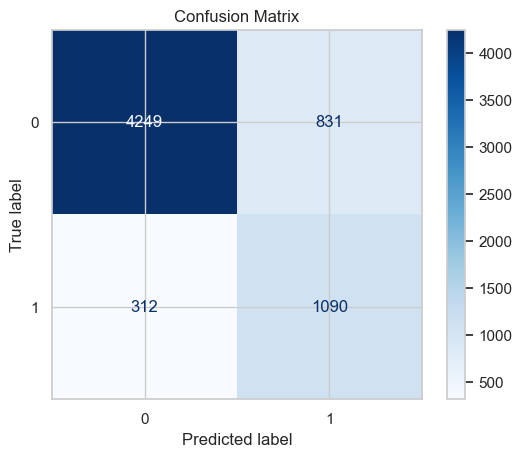

In [159]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

**SUPPORT VECTOR MACHINE**

In [160]:
#instantiating and fitting the support vector machine model

In [161]:
sv_model = SVC(kernel='linear', probability=True) 
sv_model.fit(X_train_smote, y_train_smote)
sv_predictions = sv_model.predict(X_test_scaled)

#Evaluating the SVM model
svm_accuracy = accuracy_score(y_test, sv_predictions)
print("SVM Accuracy:", svm_accuracy)
#print(classification_report(y_test, sv_predictions))

print("Classification Report:\n", classification_report(y_test, sv_predictions))


SVM Accuracy: 0.8336933045356372
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89      5080
           1       0.59      0.77      0.67      1402

    accuracy                           0.83      6482
   macro avg       0.76      0.81      0.78      6482
weighted avg       0.86      0.83      0.84      6482



In [162]:
svm_precision = precision_score(y_test, sv_predictions)
svm_recall = recall_score(y_test, sv_predictions)
svm_f1 = f1_score(y_test, sv_predictions)
print("Support Vec Machine - Precision:", svm_precision)
print("Support Vec Machine - Recall:", svm_recall)
print("Support Vect Machine - F1 Score:", svm_f1)

Support Vec Machine - Precision: 0.5885245901639344
Support Vec Machine - Recall: 0.7681883024251069
Support Vect Machine - F1 Score: 0.6664603960396039


In [163]:
#building a confusion matrix for support vector model

<Figure size 800x600 with 0 Axes>

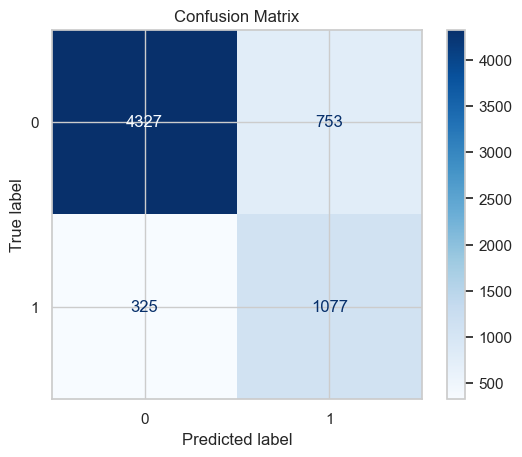

In [164]:
cm = confusion_matrix(y_test, sv_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

**XGBOOST CLASSIFIER**

In [165]:
# Training and instantiating XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_smote, y_train_smote)
xgb_predictions = xgb_model.predict(X_test_scaled)

# Evaluating XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)
#print(classification_report(y_test, xgb_predictions))

print("Classification Report:\n", classification_report(y_test, xgb_predictions ))


C:\Users\User\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:32:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9395248380129589
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      5080
           1       0.95      0.76      0.84      1402

    accuracy                           0.94      6482
   macro avg       0.95      0.87      0.90      6482
weighted avg       0.94      0.94      0.94      6482



In [166]:
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)
print("XGBoost Precision:", xgb_precision)
print("XGBoost Recall:", xgb_recall)
print("XGBoost F1 Score:", xgb_f1)

XGBoost Precision: 0.954136690647482
XGBoost Recall: 0.7567760342368046
XGBoost F1 Score: 0.8440731901352426


In [167]:
#building a confusion matrix for xgboost

<Figure size 800x600 with 0 Axes>

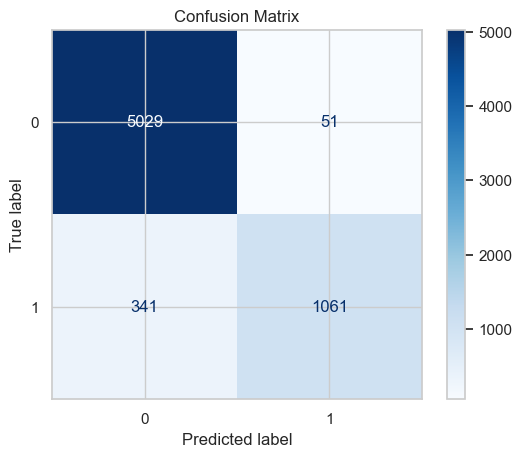

In [168]:
cm = confusion_matrix(y_test, xgb_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

**k-NEAREST NEIGHBORS**

In [169]:
# Initializing and training the K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)

# Predicting on the test set
knn_predictions = knn.predict(X_test_scaled)

# Calculating accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("k-nearest neighbors Accuracy:", knn_accuracy)
#print(classification_report(y_test, knn_predictions))

print("Classification Report:\n", classification_report(y_test, knn_predictions ))



k-nearest neighbors Accuracy: 0.8216599814871953
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88      5080
           1       0.56      0.78      0.65      1402

    accuracy                           0.82      6482
   macro avg       0.75      0.81      0.77      6482
weighted avg       0.85      0.82      0.83      6482



In [170]:
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
print("K-Nearest neighbors - Precision:", knn_precision)
print("K-Nearest neighbors - Recall:", knn_recall)
print("K-Nearest neighbors - F1 Score:", knn_f1)

K-Nearest neighbors - Precision: 0.563141683778234
K-Nearest neighbors - Recall: 0.782453637660485
K-Nearest neighbors - F1 Score: 0.6549253731343283


In [171]:
#building a confusion matrix for k nearest kneighbors

<Figure size 800x600 with 0 Axes>

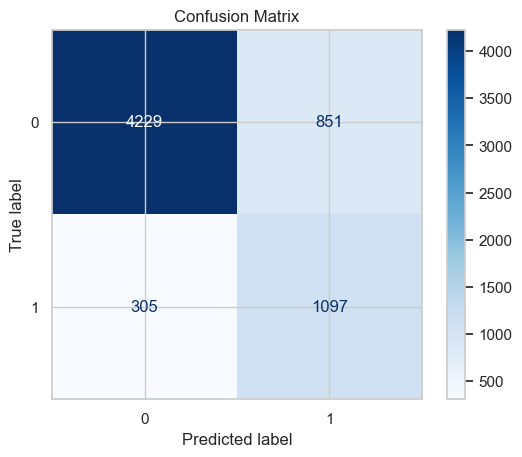

In [172]:
cm = confusion_matrix(y_test, knn_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

**RANDOM FOREST**

In [173]:
# Initializing and training the Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_smote, y_train_smote)

# Predicting on the test set
rf_predictions = random_forest.predict(X_test_scaled)

# Calculating accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("random forest Accuracy:", rf_accuracy)
#print(classification_report(y_test, rf_predictions))

print("Classification Report:\n", classification_report(y_test, rf_predictions ))




random forest Accuracy: 0.9299598889231718
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      5080
           1       0.91      0.75      0.82      1402

    accuracy                           0.93      6482
   macro avg       0.92      0.86      0.89      6482
weighted avg       0.93      0.93      0.93      6482



In [174]:
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1 Score:", rf_f1)

Random Forest Precision: 0.9136125654450262
Random Forest Recall: 0.7467902995720399
Random Forest F1 Score: 0.8218210361067504


In [175]:
#building a confusion matrix for random forest

<Figure size 800x600 with 0 Axes>

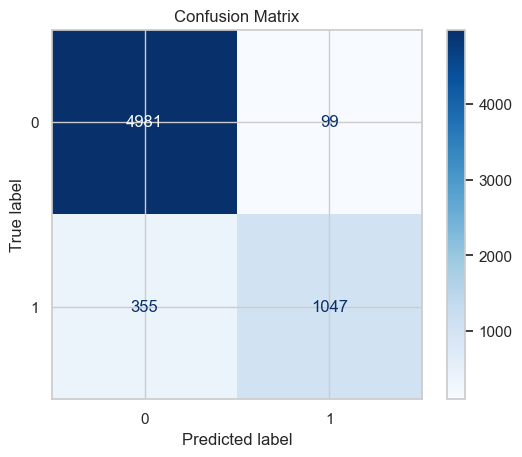

In [176]:
cm = confusion_matrix(y_test, rf_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

**ARTIFICIAL NEURAL NETWORK(ANN)**

In [177]:
# Building the ANN
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train_smote, y_train_smote, epochs=30, batch_size=32)


# Predicting the test set results
y_pred_prob = ann_model.predict(X_test_scaled)
y_preds = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary output
# Evaluate ANN model
ann_loss, ann_accuracy = ann_model.evaluate(X_test_scaled, y_test)
print("ANN Accuracy:", ann_accuracy)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_preds))



Epoch 1/30


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1266/1266 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8010 - loss: 0.4205
Epoch 2/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8455 - loss: 0.3286
Epoch 3/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8553 - loss: 0.3102
Epoch 4/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8597 - loss: 0.2967
Epoch 5/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8671 - loss: 0.2824
Epoch 6/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8659 - loss: 0.2787
Epoch 7/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8716 - loss: 0.2725
Epoch 8/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8742 - loss: 0.2625
Epoch 9/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8775 - loss: 0.2576
Epoch 10/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8836 - loss: 0.2470
Epoch 11/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8859 - loss: 0.2444
Epoch 12/30
1266/1266 ━━━━━━━━━━━━━━━━━━━

In [178]:
ann_precision = precision_score(y_test, y_preds, zero_division=1)
ann_recall = recall_score(y_test, y_preds, zero_division=1)
ann_f1 = f1_score(y_test, y_preds, zero_division=1)
print("Artificial neural network Precision:", ann_precision)
print("Artificial neural network Recall:", ann_recall)
print("Artificial neural network F1 Score:", ann_f1)

Artificial neural network Precision: 0.702650290885585
Artificial neural network Recall: 0.775320970042796
Artificial neural network F1 Score: 0.7371990505256019


<Figure size 800x600 with 0 Axes>

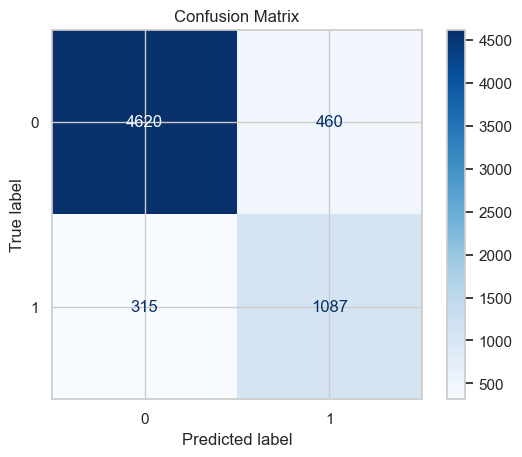

In [179]:
# Generate confusion matrix
#print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## DROPPING TWO COLUMNS TO SEE IF THE PERFORMANCE OF THE MODELS WILL IMPROVE

In [180]:
dataset2 = final_dataset.drop(columns =["cb_person_default_on_file", "person_emp_length"], axis =1)

In [181]:
#checking the shape after dropping two columns

In [182]:
dataset2.shape

(32410, 12)

In [183]:
data_encoded_new = pd.get_dummies(dataset2, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'Age_Group'])

# Preparing features and target
X_new = data_encoded_new.drop('loan_status', axis=1)
y_new = data_encoded_new['loan_status']

# Spliting the data into train and test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

#Scaling features
scaler_new = StandardScaler()
X_train_scaled_new = scaler_new.fit_transform(X_train_new)
X_test_scaled_new = scaler_new.transform(X_test_new)

In [184]:
smote_new = SMOTE(random_state=42)
X_train_smote_new, y_train_smote_new = smote_new.fit_resample(X_train_scaled_new, y_train_new)

LOGISTIC REGRESSION

In [185]:
# Creating and fitting the logistic regression model
log_model_1 = LogisticRegression(max_iter=1000)
log_model_1.fit(X_train_smote_new, y_train_smote_new)

# Predicting and evaluating the model
y_predict= log_model_1.predict(X_test_scaled_new)


print("Classification Report:\n", classification_report(y_test_new, y_predict))
print("accuracy_score: \n", accuracy_score(y_test_new,y_predict))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88      5080
           1       0.57      0.78      0.66      1402

    accuracy                           0.82      6482
   macro avg       0.75      0.81      0.77      6482
weighted avg       0.85      0.82      0.83      6482

accuracy_score: 
 0.8241283554458501


In [186]:
#building a confusion matrix for the new logistic regression model

<Figure size 800x600 with 0 Axes>

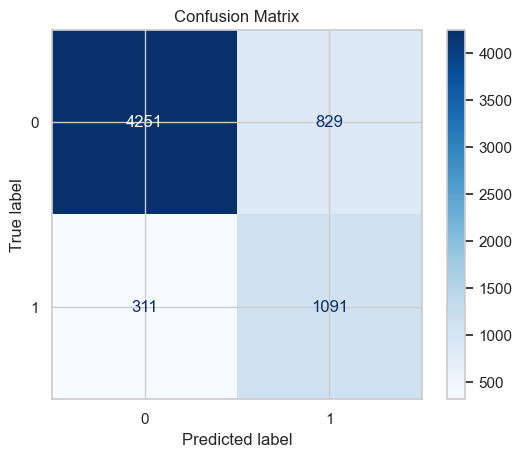

In [187]:
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

SUPPORT VECTOR MACHINE

In [188]:
#instantiating and fitting the support vector model
svm_model_1 = SVC(kernel='linear', probability=True) 
svm_model_1.fit(X_train_smote_new, y_train_smote_new)
svm_prediction = svm_model_1.predict(X_test_scaled_new)

# Evaluating the SVM model
svm_accuracys = accuracy_score(y_test_new, svm_prediction)
print("SVM Accuracy:", svm_accuracys)
print(classification_report(y_test_new, svm_prediction))


SVM Accuracy: 0.8341561246528849
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      5080
           1       0.59      0.77      0.67      1402

    accuracy                           0.83      6482
   macro avg       0.76      0.81      0.78      6482
weighted avg       0.86      0.83      0.84      6482



In [189]:
#building a confusion matrix for the new support vector model

<Figure size 800x600 with 0 Axes>

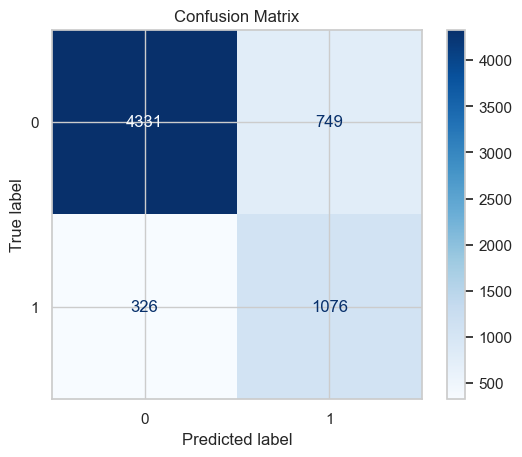

In [190]:
cm = confusion_matrix(y_test, svm_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

XGBOOOST CLASSIFIER

In [191]:
# Training and instantiating XGBoost model
xgb_model_1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model_1.fit(X_train_smote_new, y_train_smote_new)
xgboost_prediction = xgb_model_1.predict(X_test_scaled_new)

# Evaluating XGBoost model
xgb_accuracys = accuracy_score(y_test_new, xgboost_prediction)
print("XGBoost Accuracy:", xgb_accuracys)
print(classification_report(y_test_new, xgboost_prediction))


C:\Users\User\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:43:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9315026226473311
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5080
           1       0.91      0.76      0.83      1402

    accuracy                           0.93      6482
   macro avg       0.92      0.87      0.89      6482
weighted avg       0.93      0.93      0.93      6482



In [192]:
#building a confusion matrix for the new xgboost model

<Figure size 800x600 with 0 Axes>

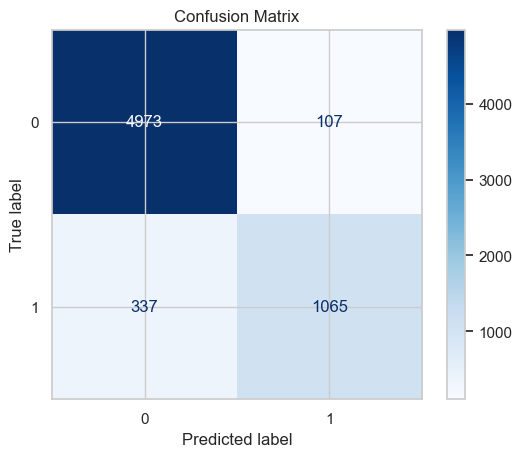

In [193]:
cm = confusion_matrix(y_test, xgboost_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

K-NEAREST NEIGHBOR

In [194]:
# Initializing and training the K-Nearest Neighbors model
knns = KNeighborsClassifier(n_neighbors=5)
knns.fit(X_train_smote_new, y_train_smote_new)

# Predicting on the test set
knn_prediction = knns.predict(X_test_scaled_new)

# Calculating accuracy
knn_accuracys = accuracy_score(y_test_new, knn_prediction)
print("knn Accuracy:", knn_accuracys)
print(classification_report(y_test_new, knn_prediction))

knn Accuracy: 0.827985189756248
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      5080
           1       0.57      0.79      0.66      1402

    accuracy                           0.83      6482
   macro avg       0.75      0.81      0.77      6482
weighted avg       0.86      0.83      0.84      6482



In [195]:
#building a confusion matrix for the new k-nearest kneighbor model

<Figure size 800x600 with 0 Axes>

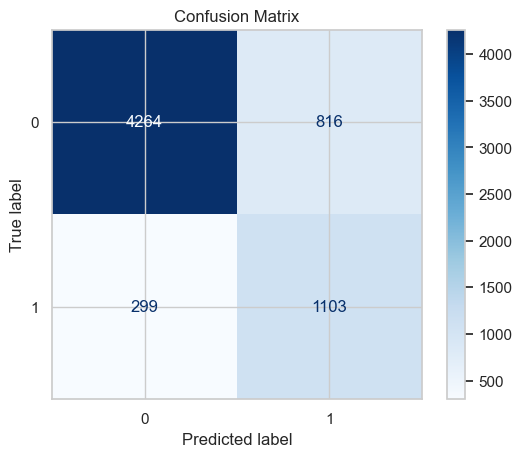

In [196]:
cm = confusion_matrix(y_test, knn_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

RANDOM FOREST

In [197]:
# Initializing and training the Random Forest model
random_forest1 = RandomForestClassifier(random_state=42)
random_forest1.fit(X_train_smote_new, y_train_smote_new)

# Predicting on the test set
rf_prediction = random_forest1.predict(X_test_scaled_new)

# Calculating accuracy
rf_accuracys = accuracy_score(y_test_new, rf_prediction)
print("random forest Accuracy:", rf_accuracys)
print(classification_report(y_test_new, rf_predictions))

random forest Accuracy: 0.9222462203023758
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      5080
           1       0.91      0.75      0.82      1402

    accuracy                           0.93      6482
   macro avg       0.92      0.86      0.89      6482
weighted avg       0.93      0.93      0.93      6482



In [198]:
#building a confusion matrix for the new random forest model

<Figure size 800x600 with 0 Axes>

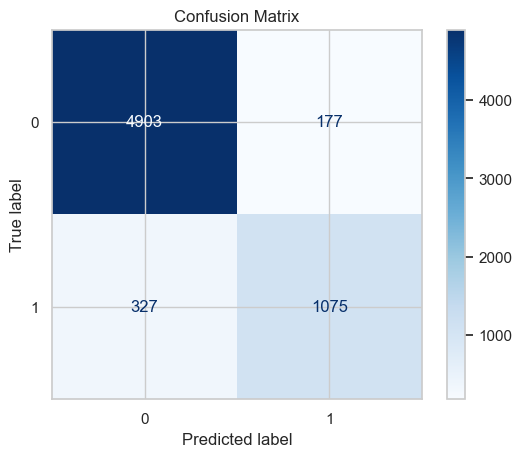

In [199]:
cm = confusion_matrix(y_test, rf_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

**ARTIFICIAL NEURAL NETWORK**

In [200]:
# Building the ANN
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_smote_new.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train_smote_new, y_train_smote_new, epochs=30, batch_size=32)

# Evaluating ANN model
ann_loss, ann_accuracy = ann_model.evaluate(X_test_scaled_new, y_test_new)
print("ANN Accuracy:", ann_accuracy)

Epoch 1/30


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1266/1266 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8060 - loss: 0.4178
Epoch 2/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8450 - loss: 0.3347
Epoch 3/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8484 - loss: 0.3250
Epoch 4/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8539 - loss: 0.3099
Epoch 5/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8538 - loss: 0.3075
Epoch 6/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8595 - loss: 0.2972
Epoch 7/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8628 - loss: 0.2935
Epoch 8/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8629 - loss: 0.2872
Epoch 9/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8682 - loss: 0.2800
Epoch 10/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8705 - loss: 0.2739
Epoch 11/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8665 - loss: 0.2801
Epoch 12/30
1266/1266 ━━━━━━━━━━━━━━━━━━━

In [201]:
#saving the best model into a pickle file to build our streamlit app

In [202]:
import pickle as pkl

In [203]:
with open("xgboost.pkl", 'wb') as f:
    pkl.dump(xgb_model, f)

In [204]:
#https://credit-risk-pga9.onrender.com

## conclusion

After all the analysis, it was discovered that the models performed better when all the the columns were used. So this reseacrh focused on using all the the columns for the analysis.In all, xgboost was the best performing model hence it was used to build the app.